Just to be sure, that the agent sees the world in the same way during evaluation as during training

In [1]:
import gym
from util import preprocess
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

OpenCV found, setting as default backend.


In [2]:
def custom_preprocess(state):
    state = cv2.cvtColor(state, cv2.COLOR_RGB2GRAY)
    state = cv2.resize(state, (84,84))
    
    # Check type is compatible
    if state.dtype != np.float32:
        state = state.astype(np.float32)

    # Scale
    if state.max() > 1:
        state *= 1. / 255.

    return state

In [3]:
env = gym.make('SpaceInvaders-v3')

[2017-10-23 22:59:09,237] Making new env: SpaceInvaders-v3


In [4]:
env.reset()
for i in range(20):
    state = env.step(0)[0]
    
print(state.shape)

(210, 160, 3)


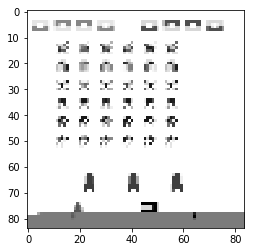

In [5]:
plt.imshow(preprocess(state), cmap='Greys')

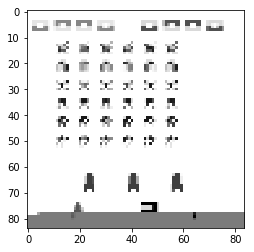

In [6]:
plt.imshow(custom_preprocess(state), cmap='Greys')

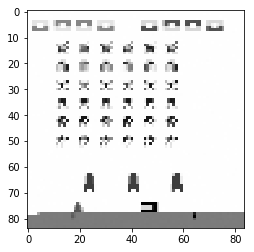

In [7]:
pic = custom_preprocess(state)+0.001*np.random.normal(size=(84,84))
plt.imshow(pic, cmap='Greys')

In [8]:
print(np.linalg.norm(custom_preprocess(state)))
print(np.linalg.norm(custom_preprocess(state)+0.001*np.random.normal(size=(84,84))))

10.9986
10.999315137
